# SMS Spam Detection with NLP and Machine Learning

This notebook demonstrates a complete workflow for detecting spam messages in SMS text using natural language processing and machine learning techniques. The project covers every step from data preprocessing and feature engineering to model training, hyperparameter tuning, and evaluation.

**Key highlights:**
- **Text preprocessing:** Advanced cleaning, tokenization, lemmatization, stemming, and vectorization (TF-IDF).
- **Model selection:** Rigorous comparison of logistic regression and random forest classifiers.
- **Handling class imbalance:** Selection of appropriate metrics (F1, recall) and tailored evaluation strategies to achieve robust classification, even with skewed data.
- **Interpretability:** Confusion matrix, precision-recall breakdown, and discussion of practical implications.

This notebook is a practical example of how to build and evaluate high-performing NLP pipelines for real-world imbalanced classification problems.


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(123)

In [ ]:
file_path = '/content/drive/MyDrive/HW3/spam.csv'
df = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  labels                                               data
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
label_counts = df['labels'].value_counts()

In [ ]:
summary_table = pd.DataFrame({'Category': label_counts.index, 'Count': label_counts.values})

In [ ]:
print("\nTotal Number of Spam and Ham Messages:")
print(summary_table)


Total Number of Spam and Ham Messages:
  Category  Count
0      ham   4825
1     spam    747


In [ ]:
print("\nObservations:")
print("1. The dataset is imbalanced, with more ham messages than spam messages.")
print("2. Precision and recall are better evaluation metrics than accuracy, as they give more insight into how well the model handles the minority class (spam).")


Observations:
1. The dataset is imbalanced, with more ham messages than spam messages.
2. Precision and recall are better evaluation metrics than accuracy, as they give more insight into how well the model handles the minority class (spam).


B)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from nltk import pos_tag

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
import nltk

nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
class LemmaTokenizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, text):
        tokens = text.split()
        pos_tags = pos_tag(tokens)
        lemmatized = [self.lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
        return lemmatized


In [ ]:
class StemTokenizer:
    def __init__(self):
        self.stemmer = PorterStemmer()

    def __call__(self, text):
        tokens = text.split()
        stemmed = [self.stemmer.stem(word) for word in tokens]
        return stemmed


In [ ]:
sample_msg = ["Congratulations you have won a 1000 dollars gift card Click here to claim your prize"]

lemma_tokenizer = LemmaTokenizer()
stem_tokenizer = StemTokenizer()

lemma_tokens = lemma_tokenizer(sample_msg[0])
print("Tokens from LemmaTokenizer:")
print(lemma_tokens)

stem_tokens = stem_tokenizer(sample_msg[0])
print("\nTokens from StemTokenizer:")
print(stem_tokens)


Tokens from LemmaTokenizer:
['Congratulations', 'you', 'have', 'win', 'a', '1000', 'dollar', 'gift', 'card', 'Click', 'here', 'to', 'claim', 'your', 'prize']

Tokens from StemTokenizer:
['congratul', 'you', 'have', 'won', 'a', '1000', 'dollar', 'gift', 'card', 'click', 'here', 'to', 'claim', 'your', 'prize']


In [ ]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [ ]:
print("Binary label column created:")
print(df[['labels', 'b_labels']].head())

Binary label column created:
  labels  b_labels
0    ham         0
1    ham         0
2   spam         1
3    ham         0
4    ham         0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['b_labels'], test_size=0.2, random_state=123)

print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

Training Set Size: 4457
Testing Set Size: 1115


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv_default = CountVectorizer()
X_train_cv_default = cv_default.fit_transform(X_train)

print("CountVectorizer (default) - Training Set Shape:")
print(X_train_cv_default.shape)


CountVectorizer (default) - Training Set Shape:
(4457, 7682)


In [ ]:
cv_lemmatization = CountVectorizer(tokenizer=LemmaTokenizer())
X_train_cv_lemma = cv_lemmatization.fit_transform(X_train)

print("CountVectorizer (lemmatization) - Training Set Shape:")
print(X_train_cv_lemma.shape)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer (lemmatization) - Training Set Shape:
(4457, 10995)


In [ ]:
cv_stemming = CountVectorizer(tokenizer=StemTokenizer())
X_train_cv_stem = cv_stemming.fit_transform(X_train)

print("CountVectorizer (stemming) - Training Set Shape:")
print(X_train_cv_stem.shape)


CountVectorizer (stemming) - Training Set Shape:
(4457, 10785)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_default = TfidfVectorizer()
X_train_tfidf_default = tfidf_default.fit_transform(X_train)

print("TF-IDF (default) - Training Set Shape:")
print(X_train_tfidf_default.shape)


TF-IDF (default) - Training Set Shape:
(4457, 7682)


In [ ]:
tfidf_limited = TfidfVectorizer(max_features=2000)
X_train_tfidf_limited = tfidf_limited.fit_transform(X_train)

print("TF-IDF (2000 features) - Training Set Shape:")
print(X_train_tfidf_limited.shape)


TF-IDF (2000 features) - Training Set Shape:
(4457, 2000)


In [ ]:
shapes = {
    "CountVectorizer (default)": X_train_cv_default.shape,
    "CountVectorizer (lemmatization)": X_train_cv_lemma.shape,
    "CountVectorizer (stemming)": X_train_cv_stem.shape,
    "TF-IDF (default)": X_train_tfidf_default.shape,
    "TF-IDF (2000 features)": X_train_tfidf_limited.shape
}

import pandas as pd
df_shapes = pd.DataFrame(shapes.items(), columns=['Technique', 'Shape'])

print("\nComparison of Training Set Shapes:")
print(df_shapes)



Comparison of Training Set Shapes:
                         Technique          Shape
0        CountVectorizer (default)   (4457, 7682)
1  CountVectorizer (lemmatization)  (4457, 10995)
2       CountVectorizer (stemming)  (4457, 10785)
3                 TF-IDF (default)   (4457, 7682)
4           TF-IDF (2000 features)   (4457, 2000)


C)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [ ]:
param_grid = {'C': [1, 0.1, 0.01]}

f1_scorer = make_scorer(f1_score, average='weighted')


In [ ]:
def train_logistic_regression(X_train, y_train):
    lr = LogisticRegression(max_iter=1000, random_state=123)

    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring=f1_scorer, verbose=1)
    grid_search.fit(X_train, y_train)

    best_f1_score = grid_search.best_score_
    return best_f1_score

f1_scores = {
    "CountVectorizer (default)": train_logistic_regression(X_train_cv_default, y_train),
    "CountVectorizer (lemmatization)": train_logistic_regression(X_train_cv_lemma, y_train),
    "CountVectorizer (stemming)": train_logistic_regression(X_train_cv_stem, y_train),
    "TF-IDF (default)": train_logistic_regression(X_train_tfidf_default, y_train),
    "TF-IDF (2000 features)": train_logistic_regression(X_train_tfidf_limited, y_train)
}

for vectorizer, score in f1_scores.items():
    print(f"{vectorizer}: {score:.4f}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CountVectorizer (default): 0.9814
CountVectorizer (lemmatization): 0.9782
CountVectorizer (stemming): 0.9786
TF-IDF (default): 0.9547
TF-IDF (2000 features): 0.9650


D)

In [ ]:
import pandas as pd

df_f1_scores = pd.DataFrame(f1_scores.items(), columns=['Vectorizer', 'F1-Score'])

print("\nCross Validation F1-Scores:")
print(df_f1_scores)



Cross Validation F1-Scores:
                        Vectorizer  F1-Score
0        CountVectorizer (default)  0.981417
1  CountVectorizer (lemmatization)  0.978184
2       CountVectorizer (stemming)  0.978620
3                 TF-IDF (default)  0.954651
4           TF-IDF (2000 features)  0.964969


In [ ]:
def train_logistic_regression(X_train, y_train):
    lr = LogisticRegression(max_iter=1000, random_state=123)

    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring=f1_scorer, verbose=1)
    grid_search.fit(X_train, y_train)

    return grid_search


In [ ]:
grid_search_cv_default = train_logistic_regression(X_train_cv_default, y_train)

optimal_C = grid_search_cv_default.best_params_['C']
print(f"The optimal value for C is: {optimal_C}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
The optimal value for C is: 1


E)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

f1_scorer_rf = make_scorer(f1_score, average='weighted')

In [ ]:
 def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(random_state=123)

    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring=f1_scorer_rf, verbose=1)
    grid_search_rf.fit(X_train, y_train)

    return grid_search_rf.best_score_, grid_search_rf.best_params_

f1_score_tfidf, best_params_tfidf = train_random_forest(X_train_tfidf_limited, y_train)

f1_score_cv_stem, best_params_cv_stem = train_random_forest(X_train_cv_stem, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
print("Random Forest Results:")
print(f"TF-IDF (2000 features): F1-score = {f1_score_tfidf:.4f}, Best Parameters = {best_params_tfidf}")
print(f"Count Vectorizer (stemming): F1-score = {f1_score_cv_stem:.4f}, Best Parameters = {best_params_cv_stem}")

Random Forest Results:
TF-IDF (2000 features): F1-score = 0.9806, Best Parameters = {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Count Vectorizer (stemming): F1-score = 0.9671, Best Parameters = {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


F)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
grid_search_rf_tfidf = GridSearchCV(
    RandomForestClassifier(random_state=123),
    param_grid_rf,
    cv=5,
    scoring=f1_scorer_rf,
    verbose=1,
    refit=True
)
grid_search_rf_tfidf.fit(X_train_tfidf_limited, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [ ]:
X_test_tfidf_limited = tfidf_limited.transform(X_test)

In [ ]:
y_pred = best_rf_model.predict(X_test_tfidf_limited)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9785
Precision: 0.9787
Recall: 0.9785
F1-Score: 0.9776


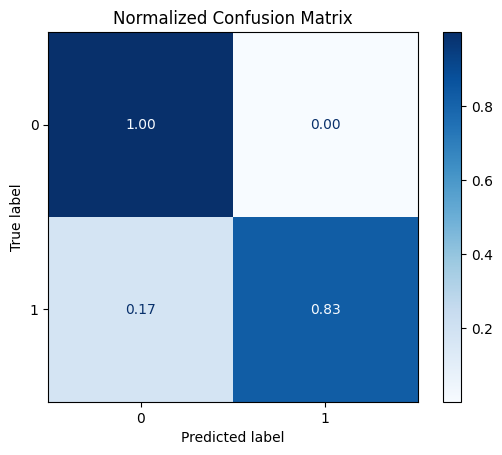

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion Matrix")
plt.show()


G)

In [ ]:
import pandas as pd

misclassified_df = pd.DataFrame({
    'Text': X_test,
    'Actual': y_test,
    'Predicted': y_pred
})

In [ ]:
false_positives = misclassified_df[(misclassified_df['Actual'] == 0) & (misclassified_df['Predicted'] == 1)]

false_negatives = misclassified_df[(misclassified_df['Actual'] == 1) & (misclassified_df['Predicted'] == 0)]


In [ ]:
print("\nFalse Positives (ham classified as spam):")
print(false_positives)

print("\nFalse Negatives (spam classified as ham):")
print(false_negatives)


False Positives (ham classified as spam):
                                                   Text  Actual  Predicted
5008  My mobile number.pls sms ur mail id.convey reg...       0          1

False Negatives (spam classified as ham):
                                                   Text  Actual  Predicted
671          SMS. ac sun0819 posts HELLO:\You seem cool       1          0
1838  Hack Chat. Get backdoor entry into 121 chat ro...       1          0
730   Email AlertFrom: Jeri StewartSize: 2KBSubject:...       1          0
1268  Can U get 2 phone NOW? I wanna chat 2 set up m...       1          0
2769  Burger King - Wanna play footy at a top stadiu...       1          0
5370  dating:i have had two of these. Only started a...       1          0
2246  Hi ya babe x u 4goten bout me?' scammers getti...       1          0
1673  Monthly password for wap. mobsi.com is 391784....       1          0
2401  Babe: U want me dont u baby! Im nasty and have...       1          0
3130  LookAtMe